In [2]:
import pyodbc

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-BERLIAN;'
                      'Database=BitMedia;'
                      'Trusted_Connection=yes;')

In [4]:
import pandas as pd
branch_df = pd.read_sql_query('SELECT * FROM branch', conn)

branch_df.head()

C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_21480\3152232819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  branch_df = pd.read_sql_query('SELECT * FROM branch', conn)


,id,branch_id,branch_name,city
0,1,B001,Bitmedia BSD,Tangerang Selatan
1,2,B002,Bitmedia SCBD,Jakarta Pusat
2,3,B003,Bitmedia Alam Sutera,Tangerang Selatan
3,4,B004,Bitmedia Bintaro,Tangerang Selatan
4,5,B005,Bitmedia Cikarang,Bekasi


In [5]:
category_df = pd.read_sql_query('SELECT * FROM category', conn)

category_df.head()

C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_21480\2230245178.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_df = pd.read_sql_query('SELECT * FROM category', conn)


,id,category_id,genre,language,cover
0,1,C0001,Fiction,English,Softcover
1,2,C0002,Fiction,English,Hardcover
2,3,C0003,Fiction,Indonesian,Softcover
3,4,C0004,Fiction,Indonesian,Hardcover
4,5,C0005,Non-fiction,English,Softcover


In [6]:
book_df = pd.read_sql_query('SELECT * FROM books_inventories', conn)

book_df.head()

C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_21480\2589915087.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  book_df = pd.read_sql_query('SELECT * FROM books_inventories', conn)


,id,isbn,book_title,book_author,year,publisher,category_id,price,quantity,branch_id
0,1,9780547928227,The Lord of the Rings,J.R.R. Tolkien,1954,Houghton Mifflin,C0005,150000.0,50,B011
1,2,9780451524935,The Hobbit,J.R.R. Tolkien,1937,Houghton Mifflin Harcourt,C0005,100000.0,40,B021
2,3,9780547928227,The Lord of the Rings,J.R.R. Tolkien,1954,Houghton Mifflin,C0005,150000.0,30,B010
3,4,9780062315007,The Hunger Games,Suzanne Collins,2008,Scholastic Press,C0006,90000.0,20,B003
4,5,9780439023528,Harry Potter and the Sorcerer's Stone,J.K. Rowling,1997,Scholastic,C0005,80000.0,40,B015


### Showing Basics Statistics

In [62]:
branch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           67 non-null     int64 
 1   branch_id    67 non-null     object
 2   branch_name  67 non-null     object
 3   city         67 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [63]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           62 non-null     int64 
 1   category_id  62 non-null     object
 2   genre        62 non-null     object
 3   language     62 non-null     object
 4   cover        62 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.6+ KB


In [64]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           66 non-null     int64  
 1   isbn         66 non-null     object 
 2   book_title   66 non-null     object 
 3   book_author  66 non-null     object 
 4   year         66 non-null     int64  
 5   publisher    66 non-null     object 
 6   category_id  66 non-null     object 
 7   price        66 non-null     float64
 8   quantity     66 non-null     int64  
 9   branch_id    66 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 5.3+ KB


In [10]:
book_df.describe()

,id,year,price,quantity
count,66.000000,66.000000,66.000000,66.000000
mean,33.500000,1966.893939,87878.787879,33.287879
std,19.196354,46.613675,24290.875242,12.073831
min,1.000000,1813.000000,40000.000000,5.000000
25%,17.250000,1949.500000,75000.000000,30.000000
50%,33.500000,1979.000000,85000.000000,34.000000
75%,49.750000,2004.500000,95000.000000,40.000000
max,66.000000,2012.000000,150000.000000,50.000000


### Exploring Our Dataset

In [14]:
book_df['year'].value_counts().sort_index(ascending=True)

year
1813    3
1892    3
1925    3
1937    3
1945    3
1949    2
1951    4
1954    5
1960    4
1977    1
1979    4
1985    1
1988    3
1995    1
1997    3
2002    1
2003    5
2005    8
2007    1
2008    5
2011    1
2012    2
Name: count, dtype: int64

In [16]:
book_df['category_id'].value_counts()

category_id
C0005    9
C0007    8
C0008    8
C0011    8
C0012    7
C0006    5
C0009    4
C0010    4
C0013    4
C0016    1
C0023    1
C0062    1
C0015    1
C0004    1
C0032    1
C0019    1
C0054    1
C0044    1
Name: count, dtype: int64

Tahun awal dan akhir publisher houghton mifflin meluncurkan buku

In [20]:
book_df.loc[book_df['publisher'].str.contains('Houghton Mifflin'),'year'].agg(("min","max"))

min    1937
max    1954
Name: year, dtype: int64

In [21]:
book_df[book_df['publisher'].str.endswith("Books")]

,id,isbn,book_title,book_author,year,publisher,category_id,price,quantity,branch_id
12,13,9780553213114,The Hitchhiker's Guide to the Galaxy,Douglas Adams,1979,Pan Books,C0011,80000.0,40,B020
25,26,9780553213114,The Hitchhiker's Guide to the Galaxy,Douglas Adams,1979,Pan Books,C0011,80000.0,40,B019
43,44,9780553213114,The Hitchhiker's Guide to the Galaxy,Douglas Adams,1979,Pan Books,C0011,80000.0,11,B049
49,50,9780425205636,The Fault in Our Stars,John Green,2012,Dutton Books,C0011,90000.0,43,B061
61,62,9780385537854,The Kite Runner,Khaled Hosseini,2003,Riverhead Books,C0016,70000.0,41,B012
65,66,9780307265434,The Fault in Our Stars,John Green,2012,Dutton Books,C0044,75000.0,32,B061


Grouping and Aggregating

In [7]:
#LEFT JOIN Tabel book inventories dengan branch berdasarkan branch_id
df_1 = pd.merge(branch_df, book_df, on='branch_id', how='inner')
df_1

#LEFT JOIN df yang telah dijoin dengan tabel category berdasarkan category_id
df_2 = pd.merge(df_1, category_df, on='category_id', how='inner')
df_2

,id_x,branch_id,branch_name,city,id_y,isbn,book_title,book_author,year,publisher,category_id,price,quantity,id,genre,language,cover
0,1,B001,Bitmedia BSD,Tangerang Selatan,20,9780312577220,The Da Vinci Code,Dan Brown,2003,Doubleday,C0007,130000.0,40,7,Non-fiction,Indonesian,Softcover
1,10,B010,Bitmedia Margonda,Depok,6,9780316015844,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Alfred A. Knopf,C0007,120000.0,30,7,Non-fiction,Indonesian,Softcover
2,11,B011,Bitmedia Pondok Indah,Jakarta Selatan,32,9780316015844,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Alfred A. Knopf,C0007,120000.0,30,7,Non-fiction,Indonesian,Softcover
3,20,B020,Bitmedia Thamrin,Jakarta Pusat,9,9780679735779,1984,George Orwell,1949,Secker & Warburg,C0007,85000.0,40,7,Non-fiction,Indonesian,Softcover
4,21,B021,Bitmedia Utan Kayu,Jakarta Timur,46,9780385504209,The Catcher in the Rye,J.D. Salinger,1951,"Little, Brown and Company",C0007,40000.0,20,7,Non-fiction,Indonesian,Softcover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,35,B035,Bitmedia Karawang Timur,Karawang,64,9780060850520,The Handmaid's Tale,Margaret Atwood,1985,McClelland & Stewart,C0062,65000.0,33,62,Humor,English,Hardcover
62,36,B036,Bitmedia Cikokol,Tangerang,57,9780316546354,To Kill a Mockingbird,Harper Lee,1960,J. B. Lippincott & Co.,C0004,80000.0,33,4,Fiction,Indonesian,Hardcover
63,38,B038,Bitmedia Cipayung,Jakarta Timur,58,9780451524935,The Lord of the Rings,J. R. R. Tolkien,1954,George Allen & Unwin,C0054,95000.0,45,54,Poetry,English,Hardcover
64,54,B054,Bitmedia Tanahabang,Jakarta Pusat,61,9781594487245,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Norstedts,C0032,85000.0,32,32,Science Fiction,Indonesian,Hardcover


<Axes: xlabel='year'>

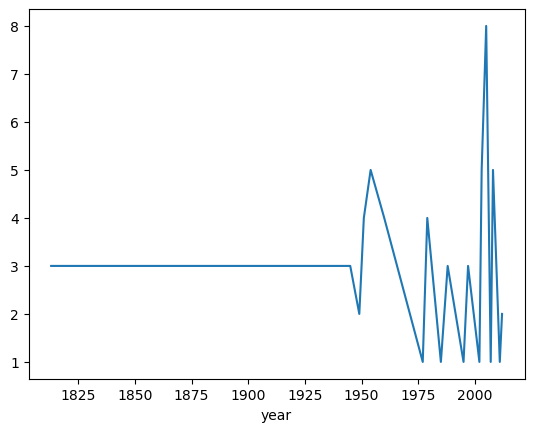

In [26]:
df_2.groupby("year")['isbn'].count().plot()

<Axes: xlabel='branch_id'>

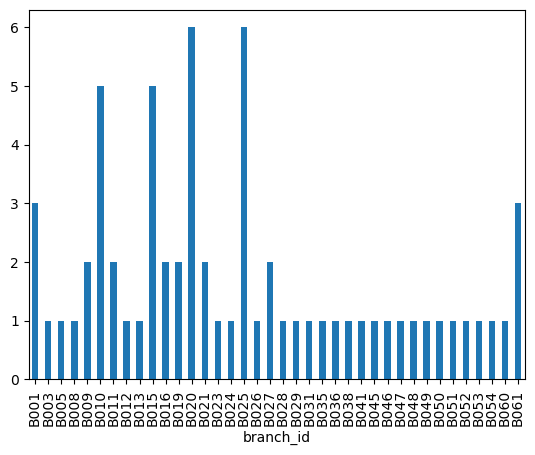

In [28]:
df_2['branch_id'].value_counts().sort_index().plot(kind="bar")

Distribusi buku berdasarkan bahasa

<Axes: xlabel='language'>

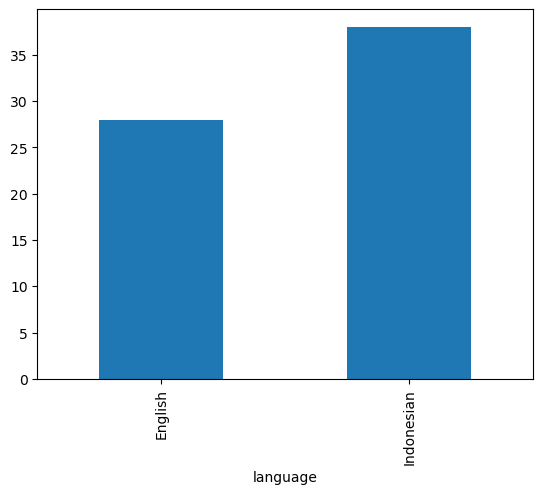

In [30]:
df_2['language'].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='cover'>

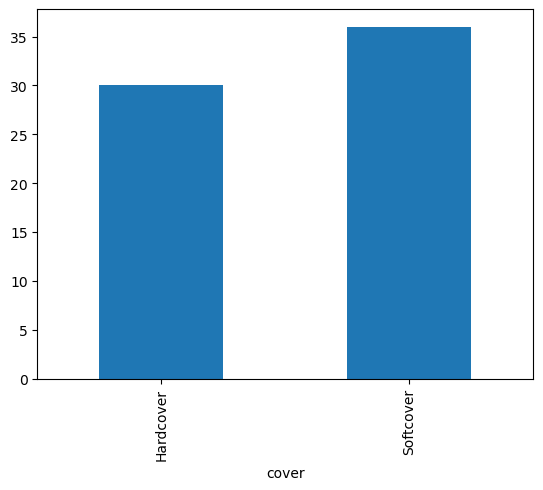

In [31]:
df_2['cover'].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='genre'>

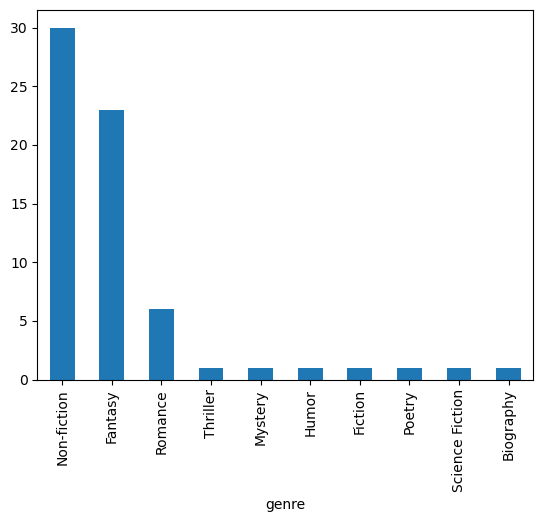

In [36]:
df_2['genre'].value_counts().sort_values(ascending=False).plot(kind="bar")

Banyak buku per city

<Axes: xlabel='city'>

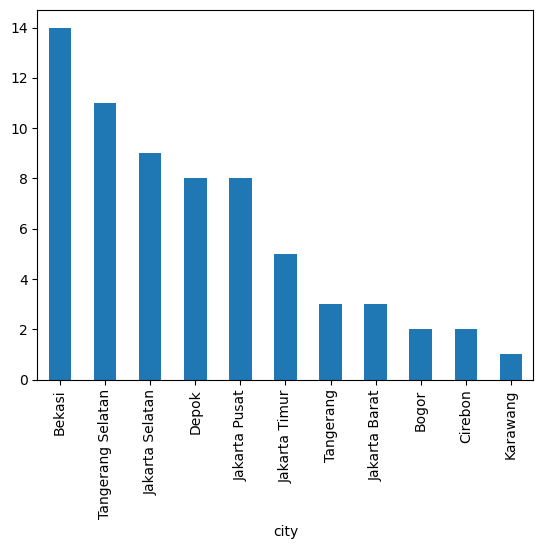

In [37]:
df_2['city'].value_counts().sort_values(ascending=False).plot(kind="bar")

Banyak branch per city

<Axes: xlabel='city'>

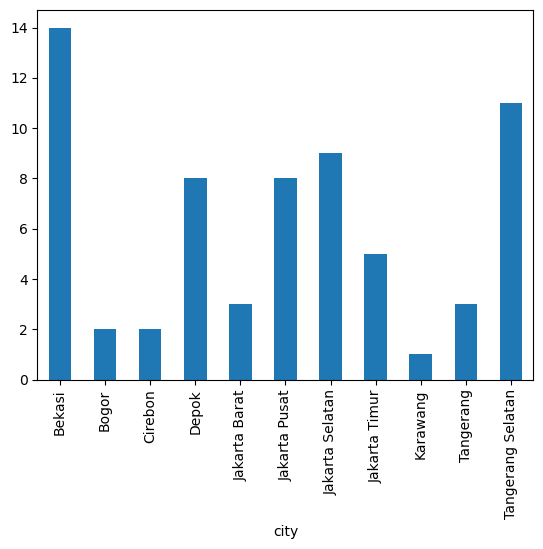

In [34]:
df_2.groupby("city")['branch_name'].count().plot(kind='bar')

Rata-rata harga buku per city

<Axes: xlabel='city'>

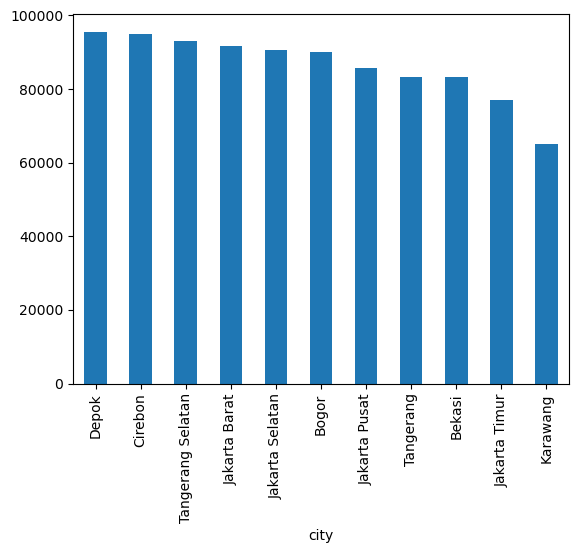

In [41]:
df_2.groupby("city")['price'].mean().sort_values(ascending=False).plot(kind='bar')

Rata-rata stock per city

<Axes: xlabel='city'>

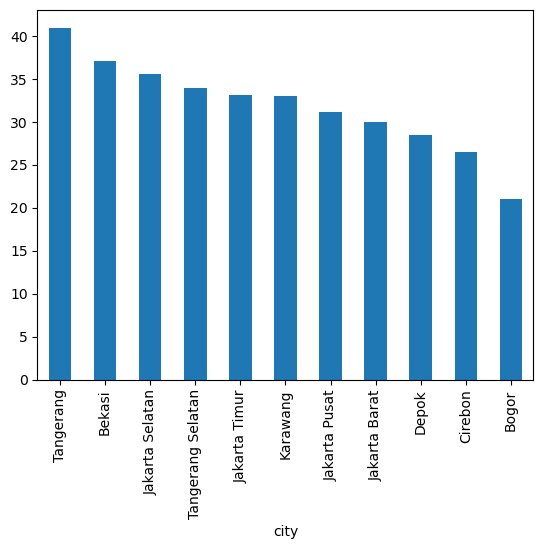

In [42]:
df_2.groupby("city")['quantity'].mean().sort_values(ascending=False).plot(kind='bar')

In [43]:
# Korelasi antara Variabel
correlation_matrix = df_2[['price', 'year', 'quantity']].corr()
print("\nMatrix Korelasi:")
print(correlation_matrix)



Matrix Korelasi:
             price      year  quantity
price     1.000000  0.157410  0.066898
year      0.157410  1.000000 -0.078699
quantity  0.066898 -0.078699  1.000000


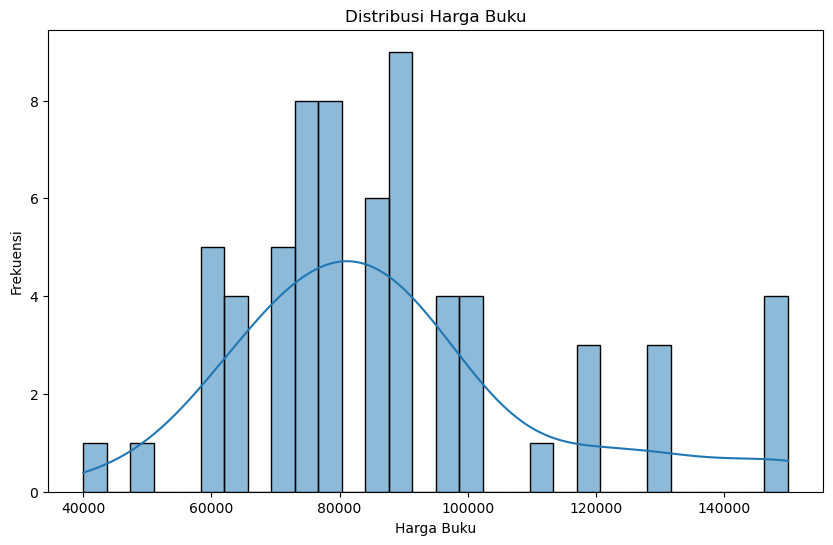

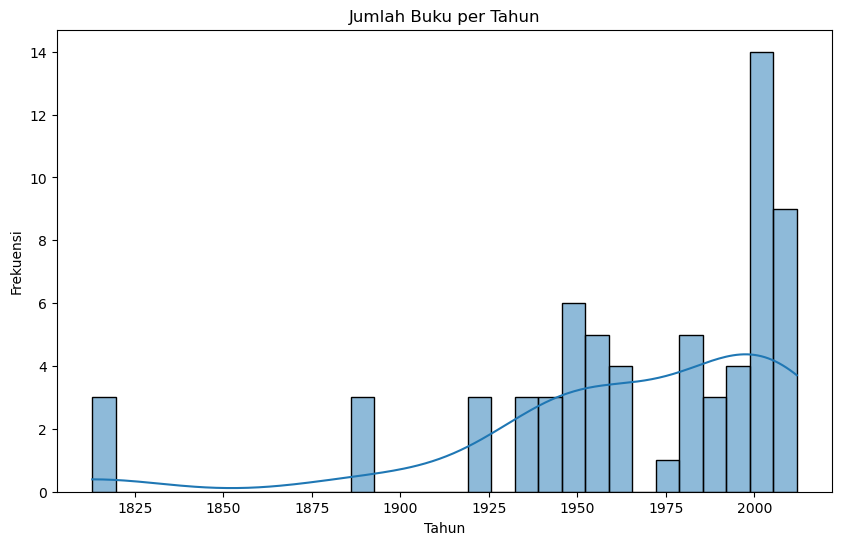

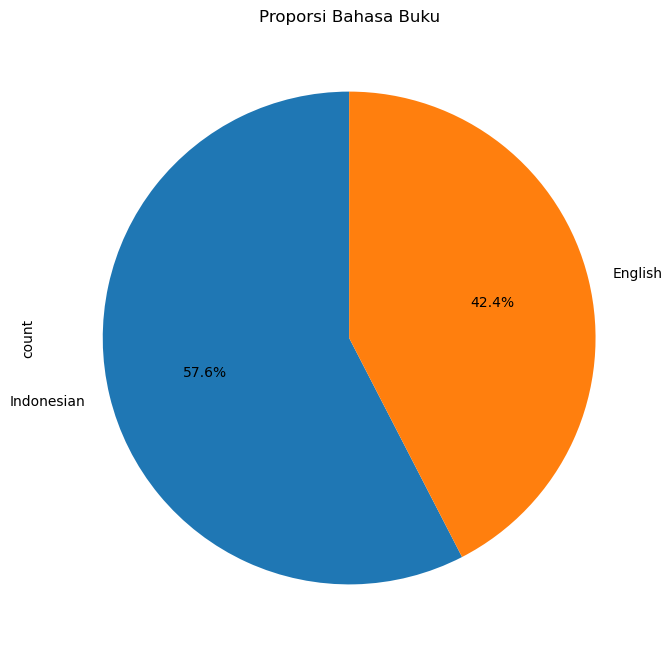

In [57]:
# Contoh Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram Harga Buku
plt.figure(figsize=(10, 6))
sns.histplot(df_2['price'], bins=30, kde=True)
plt.title('Distribusi Harga Buku')
plt.xlabel('Harga Buku')
plt.ylabel('Frekuensi')
plt.show()

# Histogram jumlah Buku per tahun
plt.figure(figsize=(10, 6))
sns.histplot(df_2['year'], bins=30, kde=True)
plt.title('Jumlah Buku per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

# Diagram Pie Proporsi Bahasa Buku
plt.figure(figsize=(10, 8))
df_2['language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Bahasa Buku')
plt.show()


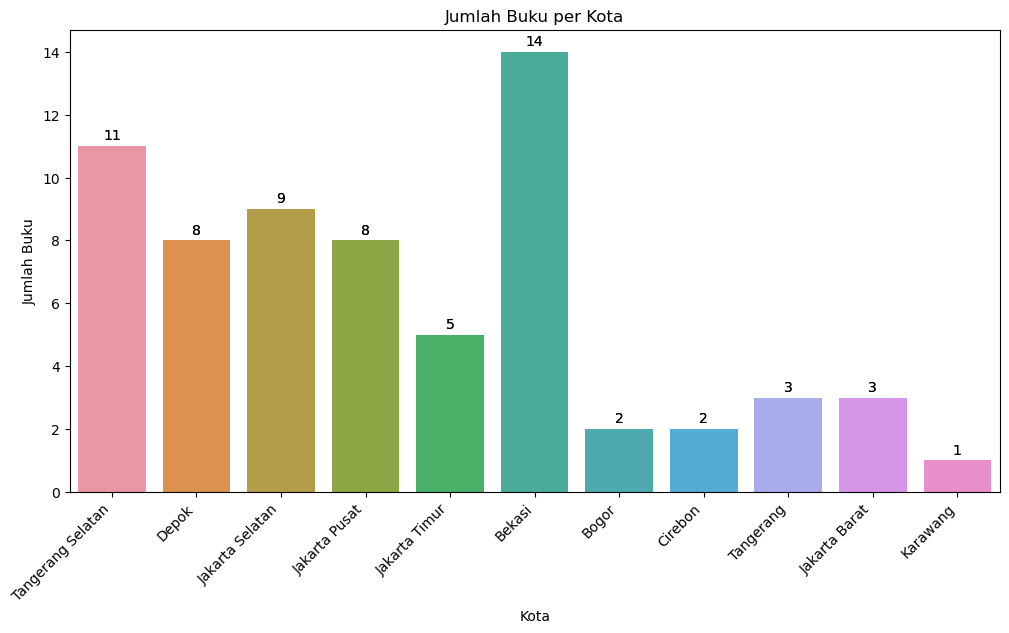

In [71]:
# Menghitung jumlah buku per kota
books_per_city = df_2.groupby('city')['isbn'].nunique().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah buku secara menurun
sorted_data = books_per_city.sort_values(by='isbn', ascending=False)
# Diagram Batang Jumlah Buku per Kota
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='city', data=df_2)
sns.countplot(x='city', data=df_2)
plt.title('Jumlah Buku per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='bottom')
plt.show()

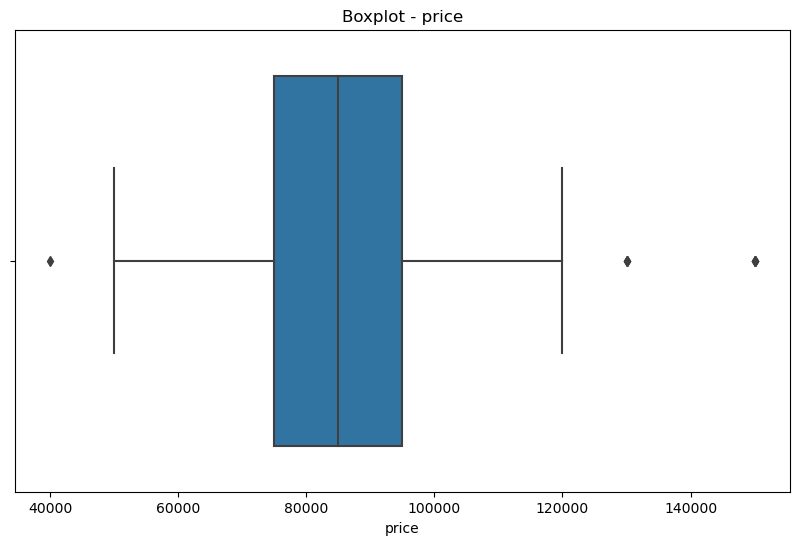

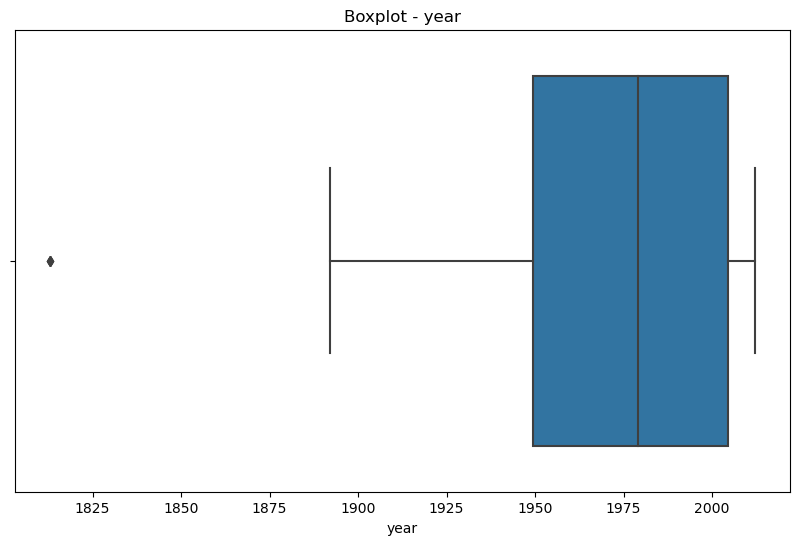

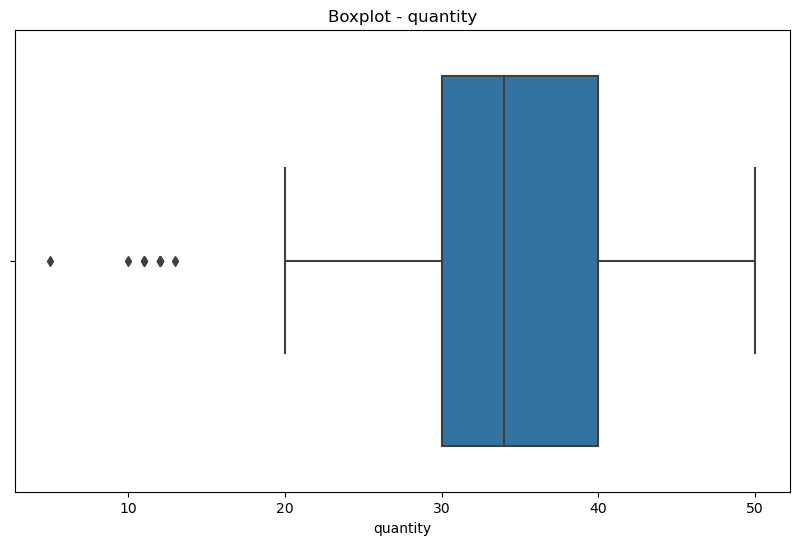

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named 'df'
# df = pd.read_csv('your_dataset.csv')

# Kolom yang ingin Anda cek untuk outlier (misalnya, 'price', 'year', 'quantity')
columns_to_check = ['price', 'year', 'quantity']

# Fungsi untuk mendeteksi dan memvisualisasikan outlier menggunakan metode IQR
def detect_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        
        # Boxplot untuk melihat distribusi dan outlier
        sns.boxplot(x=df[column])
        
        plt.title(f'Boxplot - {column}')
        plt.show()
        
        # Menghitung nilai IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Menentukan batas atas dan batas bawah untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mendeteksi dan menampilkan outlier
        # outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        # print(f'Outlier dalam kolom {column}:\n{outliers}\n')

# Panggil fungsi untuk mendeteksi outlier
detect_outliers(df_2, columns_to_check)


C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_15132\3370960636.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='branch_id', y='quantity', data=df_2,ci=None)


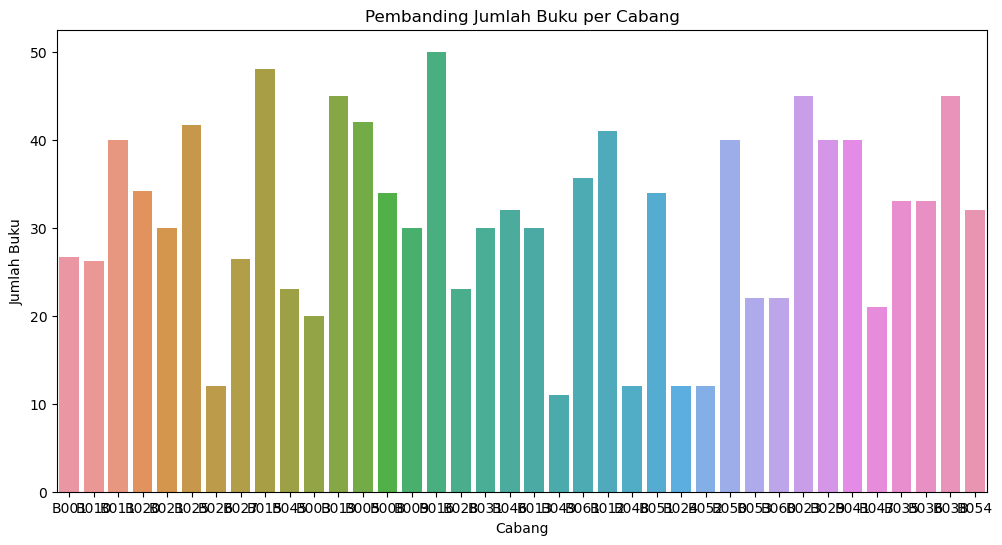

C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_15132\3370960636.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre', y='price', data=sorted_data,ci=None)


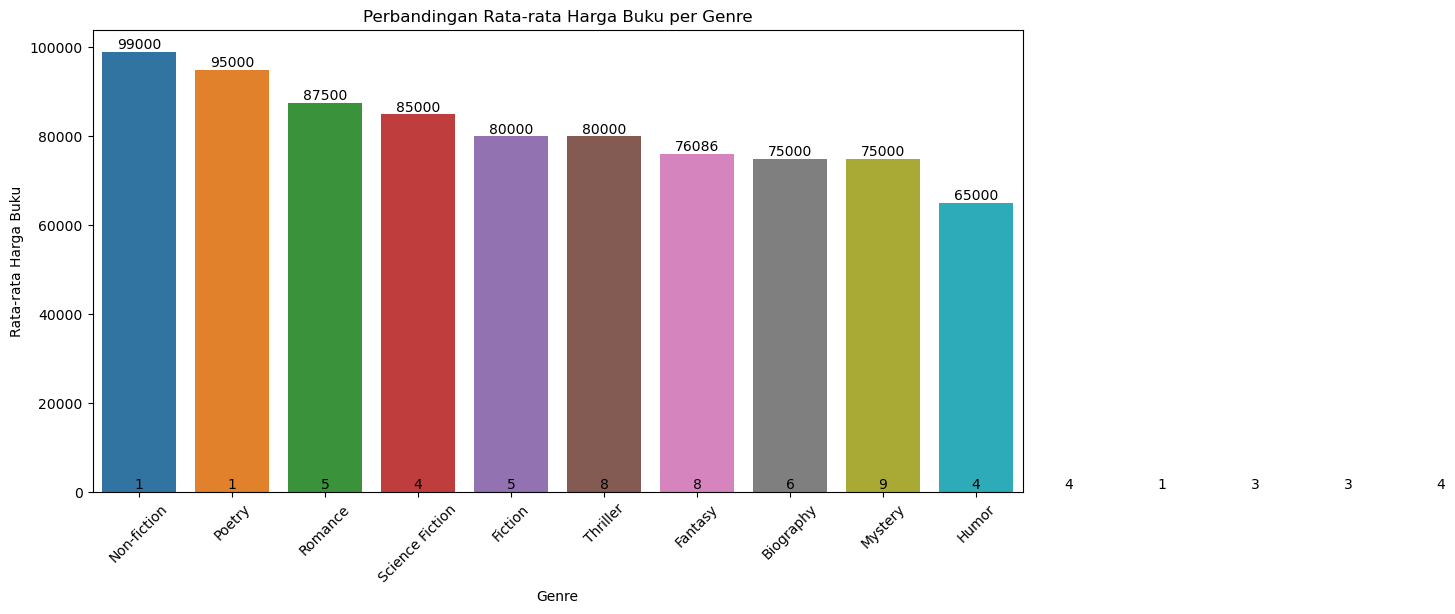

In [74]:
# Analisis Pembanding Jumlah Buku
plt.figure(figsize=(12, 6))
sns.barplot(x='branch_id', y='quantity', data=df_2,ci=None)
plt.title('Pembanding Jumlah Buku per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Jumlah Buku')
plt.show()

# Menghitung nilai rata-rata harga buku per genre


C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_15132\238494734.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='genre', y='price', data=sorted_data,ci=None)


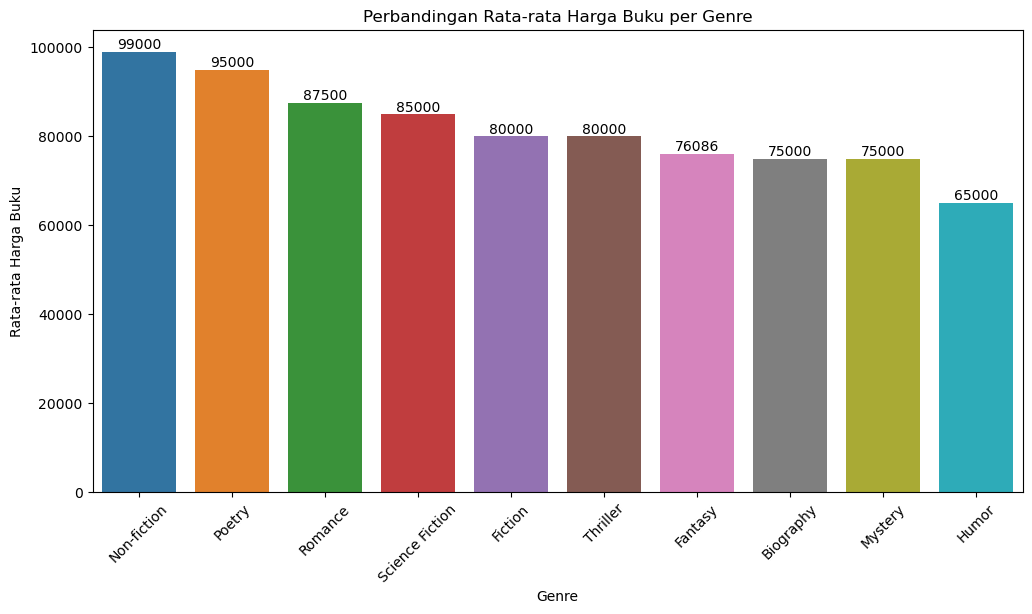

In [80]:
average_price_per_genre = df_2.groupby('genre')['price'].mean().reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata harga buku secara menurun
sorted_data = average_price_per_genre.sort_values(by='price', ascending=False)
# Analisis Pembanding Rata-rata Harga Buku per Genre
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='genre', y='price', data=sorted_data,ci=None)
plt.title('Perbandingan Rata-rata Harga Buku per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-rata Harga Buku')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='bottom')
plt.show()


In [79]:
sorted_data

,genre,price
5,Non-fiction,99000.000000
6,Poetry,95000.000000
7,Romance,87500.000000
8,Science Fiction,85000.000000
2,Fiction,80000.000000
9,Thriller,80000.000000
1,Fantasy,76086.956522
0,Biography,75000.000000
4,Mystery,75000.000000
3,Humor,65000.000000


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df_2 adalah DataFrame yang telah diolah sebelumnya
average_price_per_genre = df_2.groupby('branch_name')['isbn'].count().reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata harga buku secara menurun
sorted_data = average_price_per_genre.sort_values(by='isbn', ascending=False)

# Analisis Pembanding Rata-rata Harga Buku per Genre (Plot Vertikal)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='branch_name', y='isbn', data=sorted_data, ci=None, orient='h')  # orient='h' untuk membuat plot horizontal
plt.title('Jumlah Buku per Branch')
plt.xlabel('Branch')
plt.ylabel('Jumlah Buku')

# Menambahkan label angka di sebelah kanan setiap batang secara manual
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2.,
            f'{int(p.get_width())}', ha='left', va='center')

plt.show()


C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_15132\138668948.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='branch_name', y='isbn', data=sorted_data, ci=None, orient='h')  # orient='h' untuk membuat plot horizontal


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1200x600 with 0 Axes>

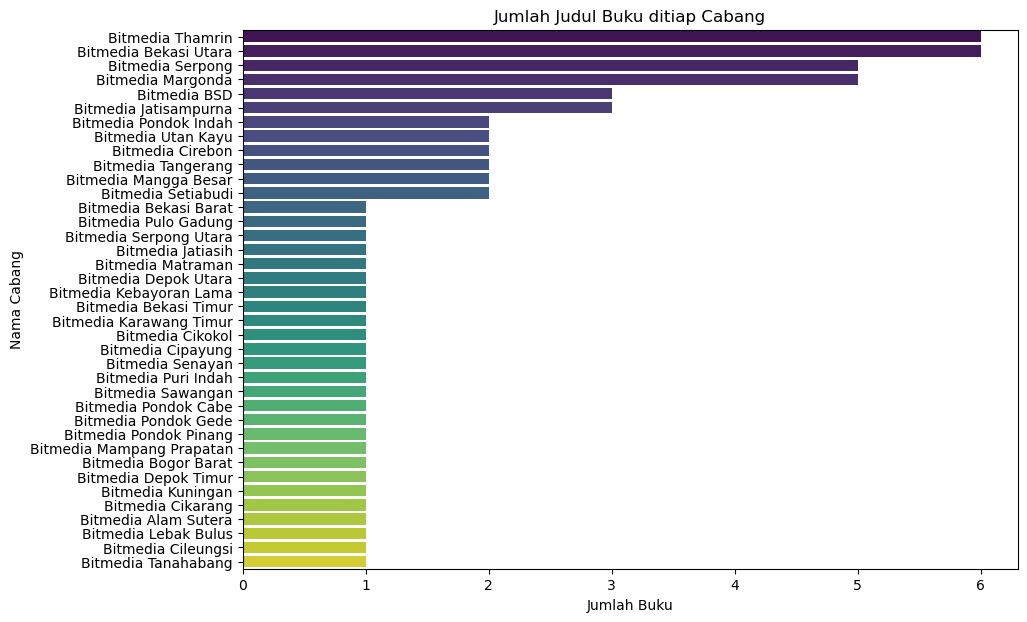

In [82]:
# Menghitung jumlah judul buku dan quantity per cabang
df_branch_inven = df_2.groupby('branch_name', sort=False)['book_title'].count().reset_index()

# Merubah nama kolom
df_branch_inven = df_branch_inven.rename(columns={'book_title': 'books_listed'})

# Mengurutkan berdasarkan jumlah buku secara descending
df_branch_inven = df_branch_inven.sort_values(by='books_listed', ascending=False)

# Menyusun ulang index setelah pengurutan
df_branch_inven = df_branch_inven.reset_index(drop=True)

# Menampilkan hasil
df_branch_inven

# Visualisasi dengan Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='books_listed', y='branch_name', data=df_branch_inven, palette='viridis')

plt.title('Jumlah Judul Buku ditiap Cabang')
plt.xlabel('Jumlah Buku')
plt.ylabel('Nama Cabang')

plt.show()

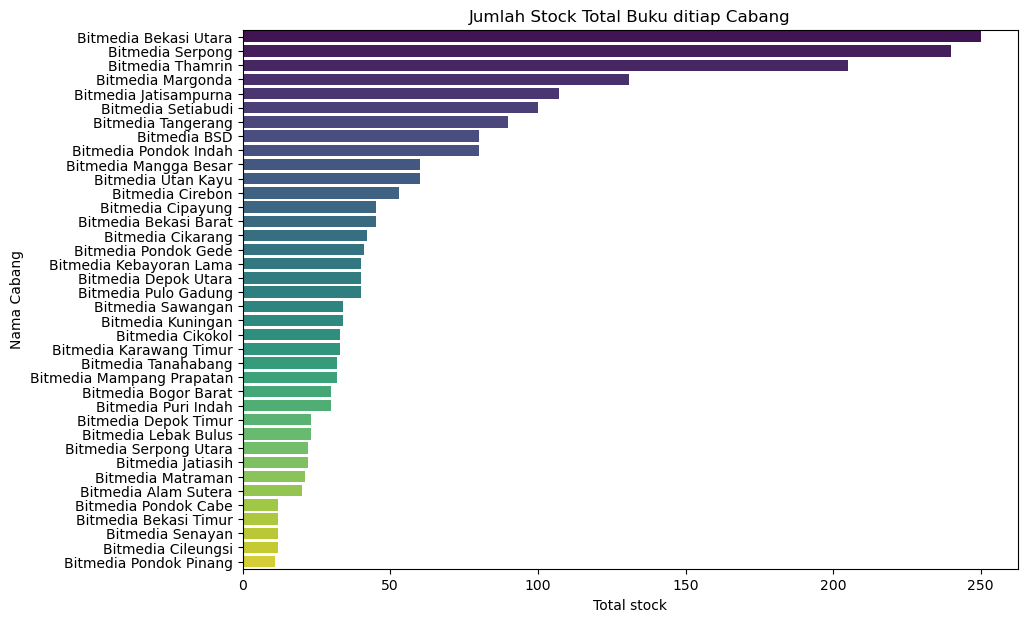

In [83]:
#Menghitung quantity buku / total stock per cabang
df_branch_total = df_2.groupby('branch_name', sort=False)['quantity'].sum().reset_index()

# Merubah nama kolom
df_branch_total = df_branch_total.rename(columns={'quantity': 'total_stock'})

# Mengurutkan berdasarkan jumlah buku secara descending
df_branch_total = df_branch_total.sort_values(by='total_stock', ascending=False)

# Menyusun ulang index setelah pengurutan
df_branch_total = df_branch_total.reset_index(drop=True)

# Menampilkan hasil
df_branch_total

# Visualisasi dengan Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='total_stock', y='branch_name', data=df_branch_total, palette='viridis')

plt.title('Jumlah Stock Total Buku ditiap Cabang')
plt.xlabel('Total stock')
plt.ylabel('Nama Cabang')

plt.show()

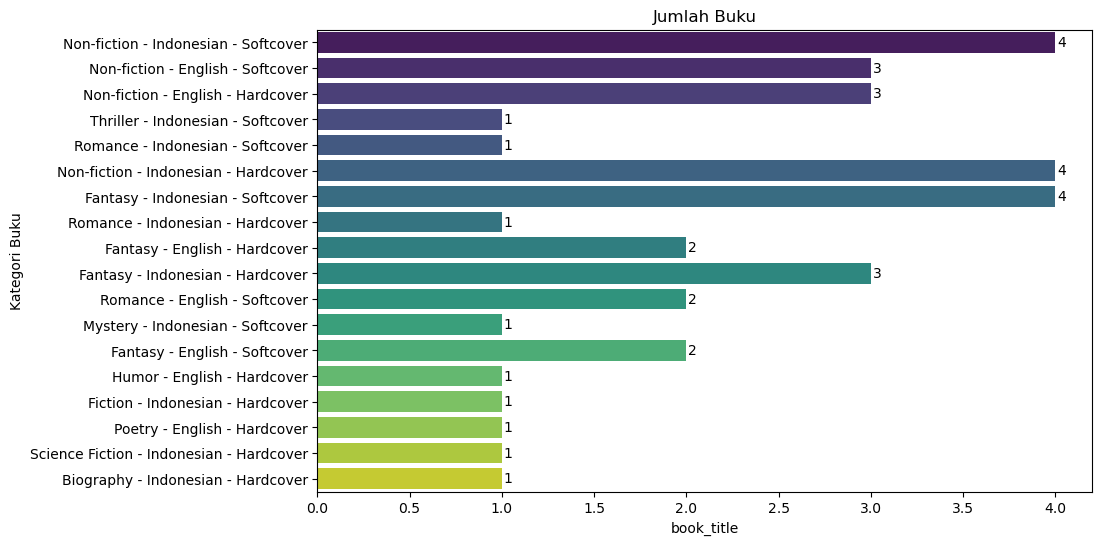

In [99]:
# Menggabungkan kolom genre, language, dan cover menjadi satu kolom
df_2['category'] = df_2['genre'].astype(str) + ' - ' + df_2['language'] + ' - ' + df_2['cover']

# Menghitung rata-rata harga buku berdasarkan kategori
df_avg_price = df_2.groupby('category', sort=False).agg({
    'price': 'mean',
    'book_title': pd.Series.nunique
}).round(2).reset_index()

# Visualisasi dengan Seaborn untuk jumlah judul buku per kategori
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='book_title', y='category', data=df_avg_price, palette='viridis')

plt.title('Jumlah Buku')
plt.ylabel('Kategori Buku')

for p in ax.patches:
    ax.text(p.get_width()+0.01, p.get_y() + p.get_height() / 2.,
            f'{int(p.get_width())}', ha='left', va='center')

plt.show()

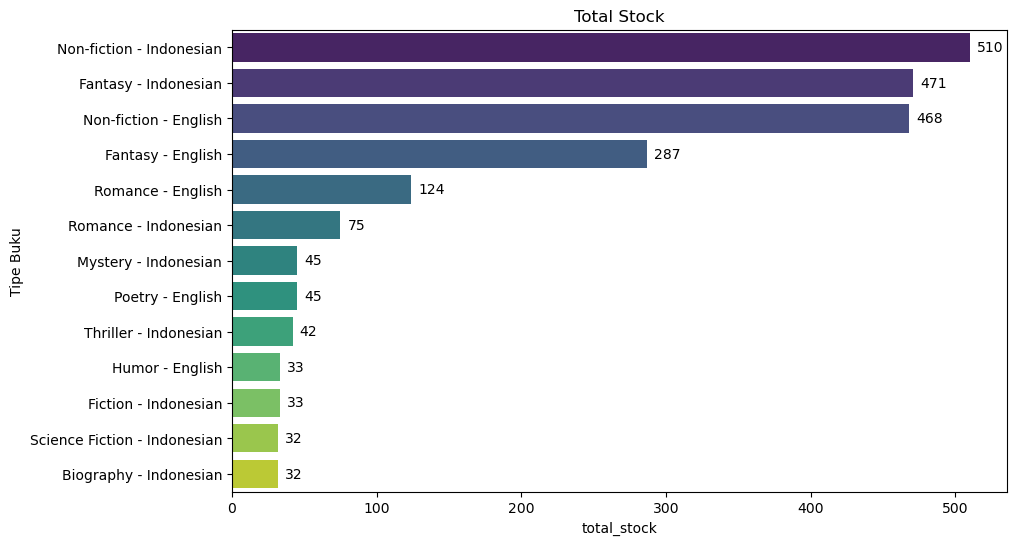

In [88]:
# Menggabungkan kolom genre, language, dan cover menjadi satu kolom
df_2['type'] = df_2['genre'].astype(str) + ' - ' + df_2['language']

# Menghitung total stock buku berdasarkan judul dan kategori
df_stock = df_2.groupby('type', sort=False).agg({
    'price': 'mean',
    'quantity': 'sum'
}).round(2).reset_index()

# Merubah nama kolom
df_stock = df_stock.rename(columns={'quantity': 'total_stock'})
df_stock = df_stock.sort_values(by='total_stock', ascending=False)

# Fungsi untuk menentukan demand
def determine_demand(stock):
    if stock > 400:
        return 'High Demand'
    elif stock < 150:
        return 'Low Demand'
    else:
        return 'Medium Demand'

# Menambahkan kolom demand ke DataFrame
df_stock['demand'] = df_stock['total_stock'].apply(determine_demand)

# Menampilkan hasil
df_stock

# Visualisasi dengan Seaborn untuk jumlah total stock per tipe
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='total_stock', y='type', data=df_stock, palette='viridis')

plt.title('Total Stock')
plt.ylabel('Tipe Buku')
for p in ax.patches:
    ax.text(p.get_width() + 5, p.get_y() + p.get_height() / 2.,
            f'{int(p.get_width())}', ha='left', va='center')


plt.show()

In [87]:
df_stock

,type,price,total_stock,demand
0,Non-fiction - Indonesian,95625.00,510,High Demand
4,Fantasy - Indonesian,79666.67,471,High Demand
1,Non-fiction - English,102857.14,468,High Demand
5,Fantasy - English,69375.00,287,Medium Demand
6,Romance - English,91250.00,124,Low Demand
3,Romance - Indonesian,80000.00,75,Low Demand
7,Mystery - Indonesian,75000.00,45,Low Demand
10,Poetry - English,95000.00,45,Low Demand
2,Thriller - Indonesian,80000.00,42,Low Demand
8,Humor - English,65000.00,33,Low Demand


In [92]:
result_df = df_2.groupby(['branch_name', 'genre', 'cover', 'language']).agg({
    'quantity': 'sum'
}).reset_index()

# Mengurutkan DataFrame berdasarkan total_stock dan branch_name
result_df = result_df.sort_values(by=['quantity', 'branch_name'], ascending=[True, True])

# Menampilkan hasil
print(result_df)

               branch_name        genre      cover    language  quantity
57        Bitmedia Thamrin  Non-fiction  Hardcover     English         5
1             Bitmedia BSD  Non-fiction  Hardcover     English        10
41  Bitmedia Pondok Pinang      Fantasy  Softcover  Indonesian        11
5    Bitmedia Bekasi Timur      Fantasy  Hardcover  Indonesian        12
15      Bitmedia Cileungsi  Non-fiction  Softcover  Indonesian        12
..                     ...          ...        ...         ...       ...
48        Bitmedia Serpong  Non-fiction  Hardcover  Indonesian        50
51      Bitmedia Setiabudi      Fantasy  Hardcover  Indonesian        50
52      Bitmedia Setiabudi  Non-fiction  Hardcover  Indonesian        50
55      Bitmedia Tangerang  Non-fiction  Hardcover     English        50
49        Bitmedia Serpong  Non-fiction  Softcover     English        90

[64 rows x 5 columns]


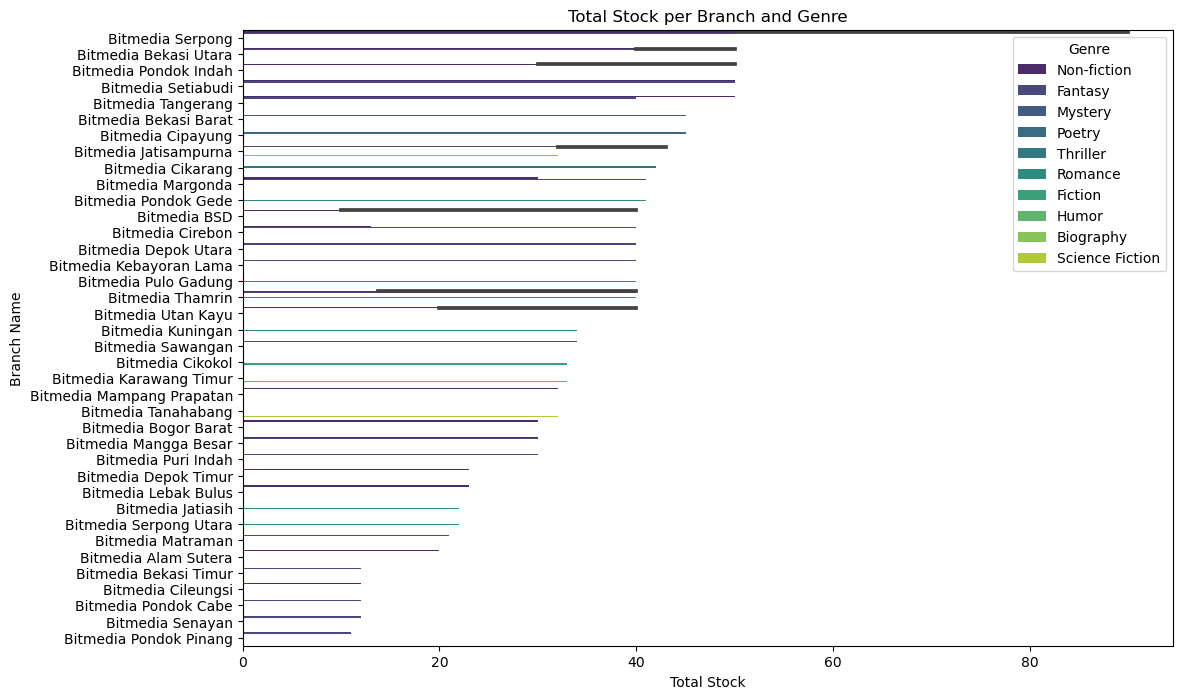

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan result_df adalah DataFrame hasil dari kueri SQL di atas

# Visualisasi dengan Seaborn untuk total stock per branch dan category
plt.figure(figsize=(12, 8))
sns.barplot(x='quantity', y='branch_name', hue='genre', data=result_df, palette='viridis')

plt.title('Total Stock per Branch and Genre')
plt.xlabel('Total Stock')
plt.ylabel('Branch Name')
plt.legend(title='Genre', loc='upper right')
plt.show()


C:\Users\Berliana Fitria Dewi\AppData\Local\Temp\ipykernel_15132\3940428990.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='book_title', data=result, palette='viridis',ci=None)


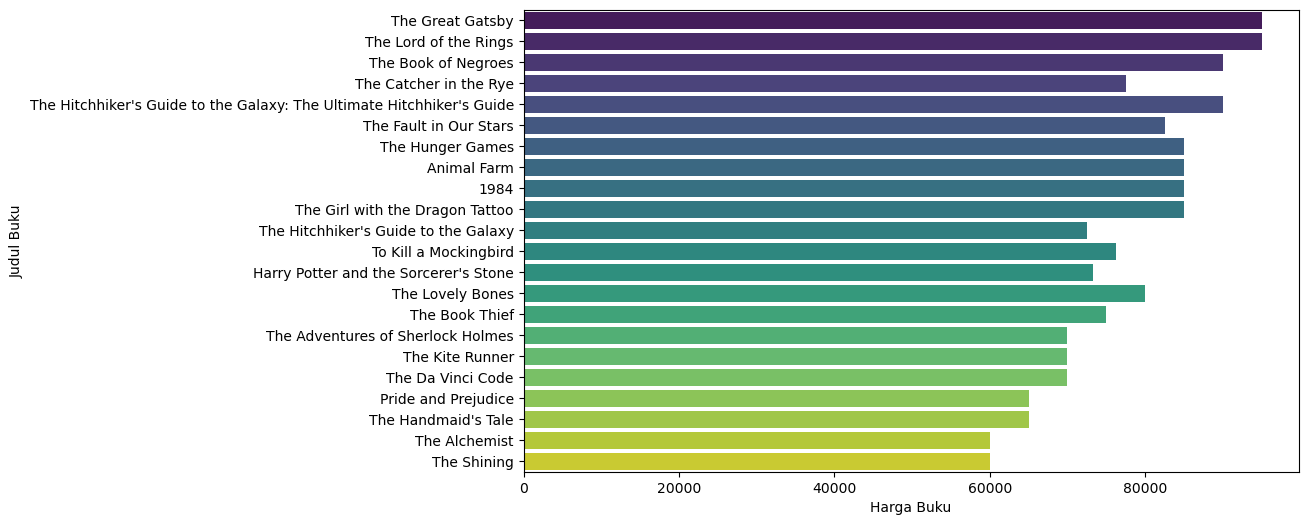

In [94]:
# Filter buku dengan harga kurang dari 100,000 atau lebih dari 500,000
filtered_books = df_2[(df_2['price'] < 100000) | (df_2['price'] > 500000)]

# Menampilkan judul buku dan harga
selected_columns = ['book_title', 'price']
result = filtered_books[selected_columns]
result = result.sort_values(by='price', ascending=False).reset_index()

# Menampilkan hasil
result

# Visualisasi dengan Seaborn untuk buku berharha < 100000 atau > 500000
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='book_title', data=result, palette='viridis',ci=None)

plt.xlabel('Harga Buku')
plt.ylabel('Judul Buku')

plt.show()

In [8]:
df_2['category'] = df_2['genre']+", "+df_2['cover']+", "+df_2['language']
df_2

,id_x,branch_id,branch_name,city,id_y,isbn,book_title,book_author,year,publisher,category_id,price,quantity,id,genre,language,cover,category
0,1,B001,Bitmedia BSD,Tangerang Selatan,20,9780312577220,The Da Vinci Code,Dan Brown,2003,Doubleday,C0007,130000.0,40,7,Non-fiction,Indonesian,Softcover,"Non-fiction, Softcover, Indonesian"
1,10,B010,Bitmedia Margonda,Depok,6,9780316015844,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Alfred A. Knopf,C0007,120000.0,30,7,Non-fiction,Indonesian,Softcover,"Non-fiction, Softcover, Indonesian"
2,11,B011,Bitmedia Pondok Indah,Jakarta Selatan,32,9780316015844,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Alfred A. Knopf,C0007,120000.0,30,7,Non-fiction,Indonesian,Softcover,"Non-fiction, Softcover, Indonesian"
3,20,B020,Bitmedia Thamrin,Jakarta Pusat,9,9780679735779,1984,George Orwell,1949,Secker & Warburg,C0007,85000.0,40,7,Non-fiction,Indonesian,Softcover,"Non-fiction, Softcover, Indonesian"
4,21,B021,Bitmedia Utan Kayu,Jakarta Timur,46,9780385504209,The Catcher in the Rye,J.D. Salinger,1951,"Little, Brown and Company",C0007,40000.0,20,7,Non-fiction,Indonesian,Softcover,"Non-fiction, Softcover, Indonesian"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,35,B035,Bitmedia Karawang Timur,Karawang,64,9780060850520,The Handmaid's Tale,Margaret Atwood,1985,McClelland & Stewart,C0062,65000.0,33,62,Humor,English,Hardcover,"Humor, Hardcover, English"
62,36,B036,Bitmedia Cikokol,Tangerang,57,9780316546354,To Kill a Mockingbird,Harper Lee,1960,J. B. Lippincott & Co.,C0004,80000.0,33,4,Fiction,Indonesian,Hardcover,"Fiction, Hardcover, Indonesian"
63,38,B038,Bitmedia Cipayung,Jakarta Timur,58,9780451524935,The Lord of the Rings,J. R. R. Tolkien,1954,George Allen & Unwin,C0054,95000.0,45,54,Poetry,English,Hardcover,"Poetry, Hardcover, English"
64,54,B054,Bitmedia Tanahabang,Jakarta Pusat,61,9781594487245,The Girl with the Dragon Tattoo,Stieg Larsson,2005,Norstedts,C0032,85000.0,32,32,Science Fiction,Indonesian,Hardcover,"Science Fiction, Hardcover, Indonesian"


In [23]:
df3 = df_2.groupby(['branch_name', 'category']).agg({'quantity': 'sum'}).sort_values(by='quantity').reset_index()
df4=df3.head(5)

In [25]:
df4

,branch_name,category,quantity
0,Bitmedia Thamrin,"Non-fiction, Hardcover, English",5
1,Bitmedia BSD,"Non-fiction, Hardcover, English",10
2,Bitmedia Pondok Pinang,"Fantasy, Softcover, Indonesian",11
3,Bitmedia Senayan,"Fantasy, Hardcover, Indonesian",12
4,Bitmedia Bekasi Timur,"Fantasy, Hardcover, Indonesian",12


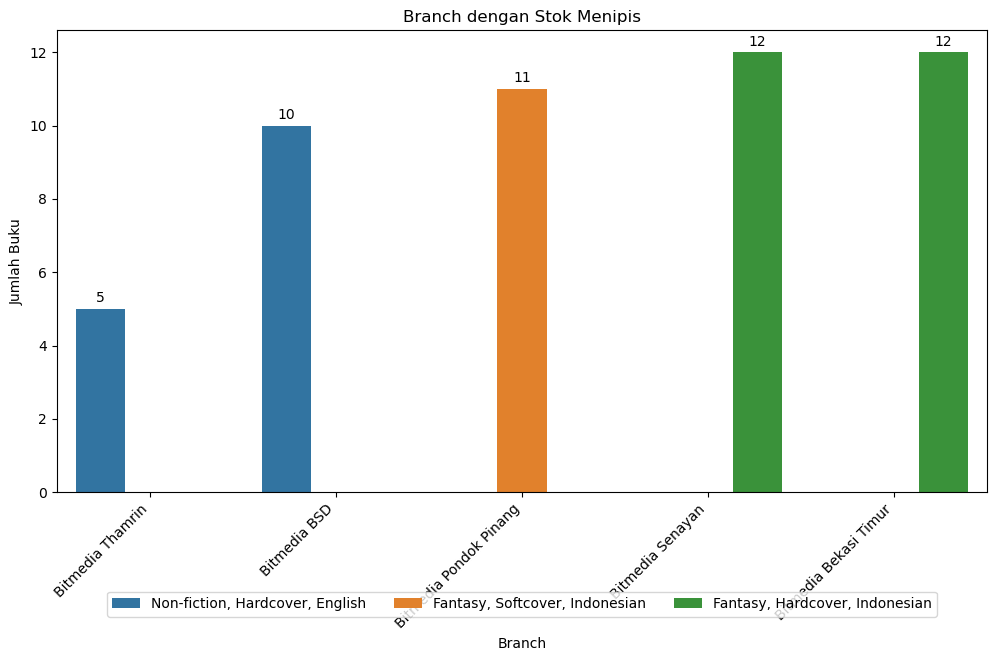

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='branch_name', y='quantity',hue='category',data=df4)
# sns.countplot(x='city', data=df3)
plt.title('Branch dengan Stok Menipis')
plt.xlabel('Branch')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=3)

for p in ax.patches:
    # print(p.get_height())
    if np.isnan(p.get_height()):
        continue
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='bottom')
plt.show()

In [20]:
df3['branch_name']

KeyError: 'branch_name'